In [72]:
from modules.load import *
import statsmodels.api as sm

In [73]:
sns.set()  #これでグラフ描画にseabornが使われるようになる

In [74]:
ls

Untitled.ipynb                    pandas.ipynb
data/                             python_機械学習_本 _3.ipynb
kaggle_titanic.ipynb              test.ipynb
modules/                          tree.png
pandas/                           線形回帰.ipynb


## データの読み込み

In [75]:
df_train  = load("data/train.csv")
df_test  = load("data/test.csv")

dfdf["Embarked"][dfdf["Embarked"] == "S"] = 0
dfdf["Embarked"][dfdf["Embarked"] == "C"] = 1
dfdf["Embarked"][dfdf["Embarked"] == "Q"] = 2

## データの確認

In [76]:
show(df_train)

dara shape==>
 (891, 12)
------------------------------
index ==>
 RangeIndex(start=0, stop=891, step=1)
------------------------------
column ==>
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
------------------------------
dtype==>
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
------------------------------
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Ow

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [211]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [77]:
feature,target = df_train.drop(["Survived"],axis=1),df_train["Survived"]

In [78]:
feature

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [79]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## フィーチャーデータを量的データとカテゴリデータに分類

In [80]:
ob,num = sepalate(feature)

int64
int64
object
object
float64
int64
int64
object
float64
object
object
Index(['Sex'], dtype='object')
Index(['Ticket'], dtype='object')
Index(['Cabin'], dtype='object')
Index(['Embarked'], dtype='object')
Index(['Pclass'], dtype='object')
                                                  Name     Sex  \
0                              Braund, Mr. Owen Harris    male   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                               Heikkinen, Miss. Laina  female   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                             Allen, Mr. William Henry    male   
..                                                 ...     ...   
886                              Montvila, Rev. Juozas    male   
887                       Graham, Miss. Margaret Edith  female   
888           Johnston, Miss. Catherine Helen "Carrie"  female   
889                              Behr, Mr. Karl Howell    male   
890                            

In [81]:
ob.dtypes

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [82]:
num.dtypes

PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

## カテゴリデータの中身確認

In [85]:
ob.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Smart, Mr. John Montgomery",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


## カテゴリ数の多いデータを消去

In [86]:
ob1=delete(ob)

colmuns
↓

1 : Name
2 : Sex
3 : Ticket
4 : Cabin
5 : Embarked
----------------------------------------------------------
What colmundo you want to kill ?:1
----------------------------------------------------------
Name is deleted


In [87]:
ob2 = delete(ob1)

colmuns
↓

1 : Sex
2 : Ticket
3 : Cabin
4 : Embarked
----------------------------------------------------------
What colmundo you want to kill ?:3
----------------------------------------------------------
Cabin is deleted


In [88]:
ob3=delete(ob2)

colmuns
↓

1 : Sex
2 : Ticket
3 : Embarked
----------------------------------------------------------
What colmundo you want to kill ?:2
----------------------------------------------------------
Ticket is deleted


## ラベル付けして数値データにする

In [89]:
# ラクするよう
# LabelEncoderのインスタンスを生成
def label_encode(df):
    print("choice label encode colmuns !")
    print(df.columns.values)
    col = input().split()
    le = LabelEncoder()
    # ラベルを覚えさせる
    le = le.fit(df[col])
    # ラベルを整数に変換
    df[col] = le.transform(df[col])
    return df

In [90]:
concat = concat_num_ob(ob3,num)

In [91]:
train = label_encode(concat)

choice label encode colmuns !
['Sex' 'Embarked' 'PassengerId' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare']
Sex


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [216]:
test = label_encode(df_test)

choice label encode colmuns !
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
Sex


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [217]:
null_table(train)

,欠損数,%
Sex,0,0.0
Embarked,0,0.0
PassengerId,0,0.0
Pclass,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0


In [218]:
train1= train.fillna(train["Age"].mean())

In [94]:
null_table(train1)

,欠損数,%
Sex,0,0.0
Embarked,0,0.0
PassengerId,0,0.0
Pclass,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0


In [219]:
null_table(test)

,欠損数,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [221]:
#テストも同様に
test1 = test.fillna(train["Age"].mean())

In [227]:
test1.shape

(418, 11)

In [235]:
test1.Fare.fillna(test1.Fare.median())

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [237]:
null_table(test1)

,欠損数,%
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0
Cabin,0,0.0


In [96]:
train1.describe(include="O")

,Embarked
count,891
unique,4
top,S
freq,644


In [238]:
test1.describe(include="O")

,Name,Ticket,Cabin,Embarked
count,418,418,418.000000,418
unique,418,363,77.000000,3
top,"Wilkes, Mrs. James (Ellen Needs)",PC 17608,29.653446,S
freq,1,5,327.000000,270


In [97]:
train1["Embarked"].unique()

array(['S', 'C', 'Q', 29.69911764705882], dtype=object)

In [100]:
train1

,Sex,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,S,1,3,22.000000,1,0,7.2500
1,0,C,2,1,38.000000,1,0,71.2833
2,0,S,3,3,26.000000,0,0,7.9250
3,0,S,4,1,35.000000,1,0,53.1000
4,1,S,5,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,1,S,887,2,27.000000,0,0,13.0000
887,0,S,888,1,19.000000,0,0,30.0000
888,0,S,889,3,29.699118,1,2,23.4500
889,1,C,890,1,26.000000,0,0,30.0000


In [102]:
train1["Embarked"].unique()

array(['S', 'C', 'Q', 29.69911764705882], dtype=object)

In [103]:
train1["Embarked"] = train1["Embarked"].replace({"S":0,"Q":1,"C":2})

In [106]:
train1["Embarked"].max()

29.69911764705882

In [239]:
test1.Embarked = test1.Embarked.replace({"S":0,"Q":1,"C":2})

In [240]:
test_fin = test1

In [112]:
train2 = delete(train1)

colmuns
↓

1 : Sex
2 : Embarked
3 : PassengerId
4 : Pclass
5 : Age
6 : SibSp
7 : Parch
8 : Fare
----------------------------------------------------------
What colmundo you want to kill ?:3
----------------------------------------------------------
PassengerId is deleted


In [113]:
train2

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,0,2.0,1,38.000000,1,0,71.2833
2,0,0.0,3,26.000000,0,0,7.9250
3,0,0.0,1,35.000000,1,0,53.1000
4,1,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,1,0.0,2,27.000000,0,0,13.0000
887,0,0.0,1,19.000000,0,0,30.0000
888,0,0.0,3,29.699118,1,2,23.4500
889,1,2.0,1,26.000000,0,0,30.0000


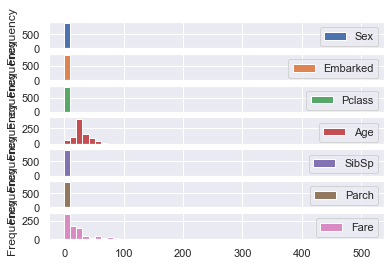

In [114]:
train2.plot(kind='hist', bins=50, subplots=True);

In [115]:
null_table(train1)

,欠損数,%
Sex,0,0.0
Embarked,0,0.0
PassengerId,0,0.0
Pclass,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0


In [118]:
train1["Embarked"].unique()

array([ 0.        ,  2.        ,  1.        , 29.69911765])

In [126]:
train1["Embarked"].dtypes

dtype('float64')

In [130]:
train1["Embarked"][train1["Embarked"] == 29.69911765] =0.0

/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
train1

,Sex,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,1,3,22.000000,1,0,7.2500
1,0,2.0,2,1,38.000000,1,0,71.2833
2,0,0.0,3,3,26.000000,0,0,7.9250
3,0,0.0,4,1,35.000000,1,0,53.1000
4,1,0.0,5,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,1,0.0,887,2,27.000000,0,0,13.0000
887,0,0.0,888,1,19.000000,0,0,30.0000
888,0,0.0,889,3,29.699118,1,2,23.4500
889,1,2.0,890,1,26.000000,0,0,30.0000


## データの統計的確認

In [133]:
#グラフ描画

def graph_plot(df):
    choice = int(input("グラフの描画タイプはどうしますか?\n1:全て 2:ターゲットを決める"))
    if choice ==1:
        show=sns.pairplot(df)
        print(show)
    elif choice ==2:
        target = input("ターゲットはどうしますか？")
        show = sns.pairplot(df,hue=target)
        print(show)

In [138]:
train1

,Sex,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,1,3,22.000000,1,0,7.2500
1,0,2.0,2,1,38.000000,1,0,71.2833
2,0,0.0,3,3,26.000000,0,0,7.9250
3,0,0.0,4,1,35.000000,1,0,53.1000
4,1,0.0,5,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,1,0.0,887,2,27.000000,0,0,13.0000
887,0,0.0,888,1,19.000000,0,0,30.0000
888,0,0.0,889,3,29.699118,1,2,23.4500
889,1,2.0,890,1,26.000000,0,0,30.0000


In [140]:
concat = pd.concat((train1,target),axis=1)

In [141]:
concat

,Sex,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,1,0.0,1,3,22.000000,1,0,7.2500,0
1,0,2.0,2,1,38.000000,1,0,71.2833,1
2,0,0.0,3,3,26.000000,0,0,7.9250,1
3,0,0.0,4,1,35.000000,1,0,53.1000,1
4,1,0.0,5,3,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,1,0.0,887,2,27.000000,0,0,13.0000,0
887,0,0.0,888,1,19.000000,0,0,30.0000,1
888,0,0.0,889,3,29.699118,1,2,23.4500,0
889,1,2.0,890,1,26.000000,0,0,30.0000,1


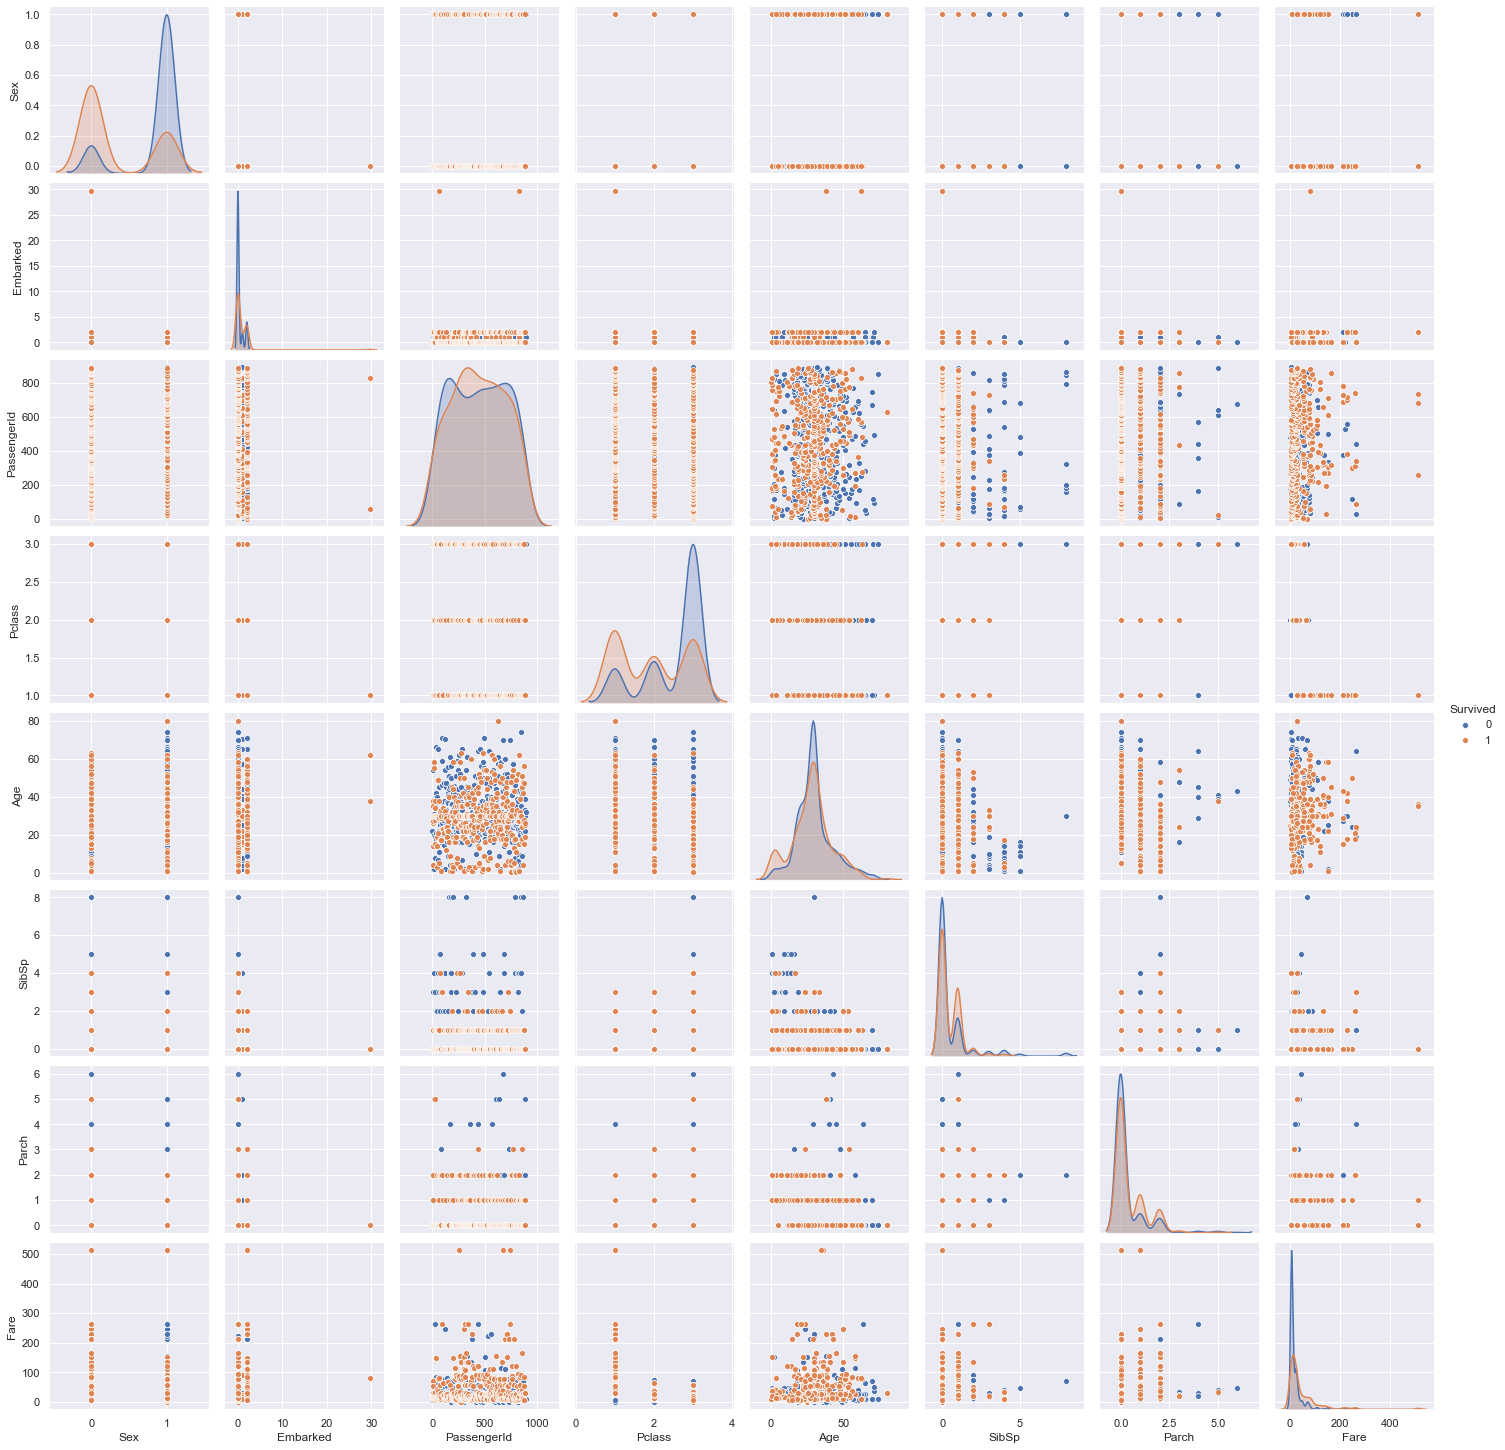

In [144]:
sns.pairplot(concat,hue="Survived")

In [145]:
concat_kai = concat[(concat.Embarked < 5) & (concat.Embarked >=0)]

In [146]:
concat_kai.Embarked.unique()

array([0., 2., 1.])

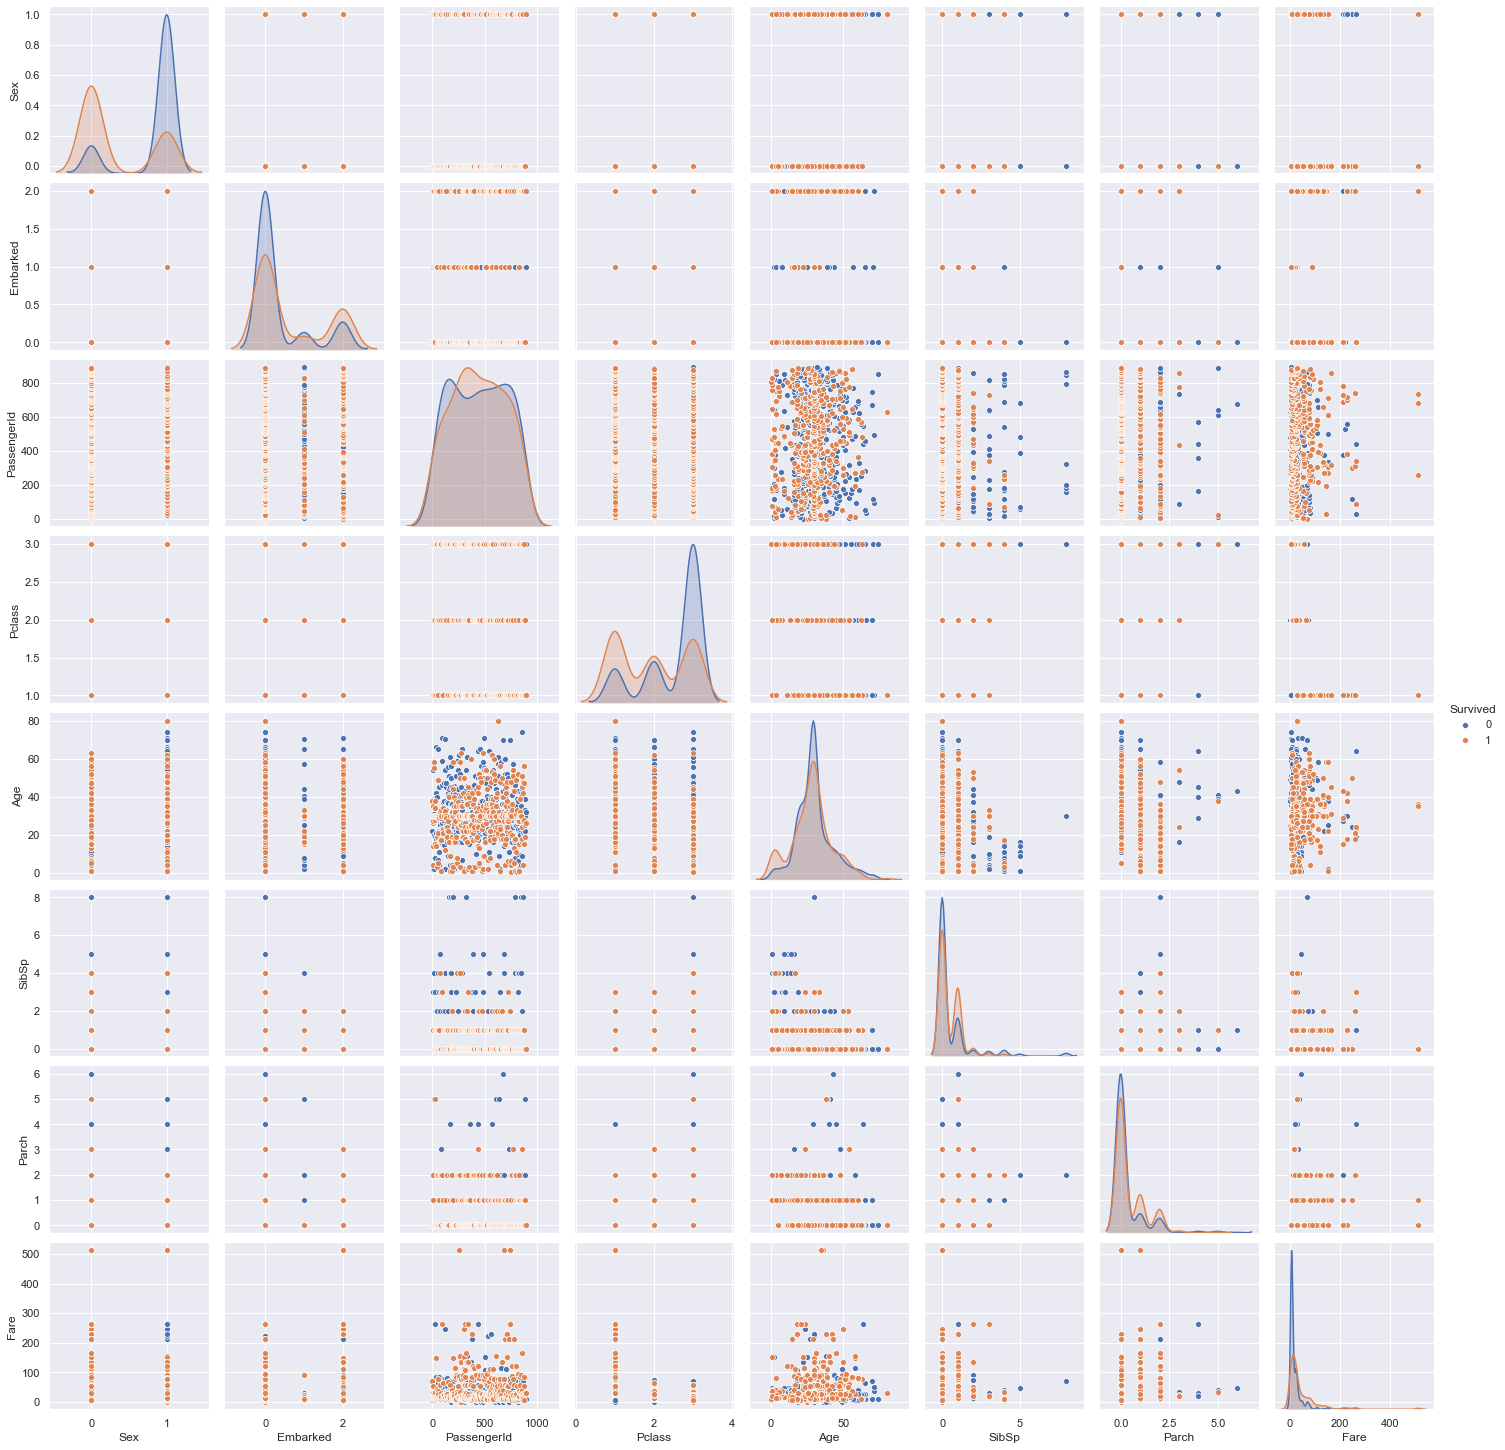

In [147]:
sns.pairplot(concat_kai,hue = "Survived")

In [151]:
train = delete(concat_kai)

colmuns
↓

1 : Sex
2 : Embarked
3 : PassengerId
4 : Pclass
5 : Age
6 : SibSp
7 : Parch
8 : Fare
9 : Survived
----------------------------------------------------------
What colmundo you want to kill ?:9
----------------------------------------------------------
Survived is deleted


In [162]:
target_kai = concat_kai["Survived"]

In [152]:
train

,Sex,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,1,3,22.000000,1,0,7.2500
1,0,2.0,2,1,38.000000,1,0,71.2833
2,0,0.0,3,3,26.000000,0,0,7.9250
3,0,0.0,4,1,35.000000,1,0,53.1000
4,1,0.0,5,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,1,0.0,887,2,27.000000,0,0,13.0000
887,0,0.0,888,1,19.000000,0,0,30.0000
888,0,0.0,889,3,29.699118,1,2,23.4500
889,1,2.0,890,1,26.000000,0,0,30.0000


In [163]:
target_kai

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

### 表の重要な指標    
#### 係数の表  
coef:const→切片　　coef:size→sizeの重み　　
std_err:標準誤差→0に近ければ良い  
t:t値  
P>|t|:P検定→P<0.05であれば良い指標    
#### モデルの要約の表
Dep. Variable:従属変数→この指標を使うと良い  
Models:回帰の種類→OLS:最小二乗法  
R-squared:決定係数 0-1の間 1に近いと良い　しかし0.2-0.9をとる  
Adj. R-squared::自由度修正済み決定係数:決定係数より低く出る 高ければ高いほどよい  
F-statistic:F検定 H_0=0(帰無仮説が0) 0に近いとだめ  
Prob (F-statistic):F値　上から0に近いのが好ましい

## これをしないと正しい回帰式が出ない

In [159]:
type(train)

pandas.core.frame.DataFrame

In [160]:
X = sm.add_constant(train)

In [164]:
results3 = sm.OLS(target_kai,X).fit()

In [165]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     72.13
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           3.95e-91
Time:                        23:40:06   Log-Likelihood:                -395.81
No. Observations:                 889   AIC:                             809.6
Df Residuals:                     880   BIC:                             852.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2723      0.074     17.121      0.000       1.126       1.418
Sex            -0.5062      0.028    -17.993      0.000      -0.561      -0.451
Embarked        0.0354      0.017      2.117      0.035       0.003       0.068
PassengerId  1.115e-05   4.98e-05      0.224      0.823   -8.65e-05       0.000
Pclass         -0.1688      0.020     -8.569      0.000      -0.207      -0.130
Age            -0.0059      0.001     -5.437      0.000      -0.008      -0.004
SibSp          -0.0410      0.013     -3.133      0.002      -0.067      -0.015
Parch          -0.0170      0.018     -0.936      0.350      -0.053       0.019
Fare            0.0003      0.000      0.858      0.391      -0.000       0.001
==============================================================================
Omnibus:                       38.500   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.565
Skew:                           0.533   Prob(JB):                     5.72e-10
Kurtosis:                       3.106   Cond. No.                     3.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [167]:
feature_imp =  train[["Sex","Pclass","Age","SibSp"]]

In [241]:
test_imp = test_fin[["Sex","Pclass","Age","SibSp"]]

In [168]:
X2 = sm.add_constant(feature_imp)

In [169]:
results4 = sm.OLS(target_kai,X2).fit()

In [170]:
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     142.1
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           8.84e-94
Time:                        23:45:34   Log-Likelihood:                -399.29
No. Observations:                 889   AIC:                             808.6
Df Residuals:                     884   BIC:                             832.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3350      0.059     22.538      0.000       1.219       1.451
Sex           -0.5084      0.027    -18.589      0.000      -0.562      -0.455
Pclass        -0.1835      0.016    -11.175      0.000      -0.216      -0.151
Age           -0.0059      0.001     -5.484      0.000      -0.008      -0.004
SibSp         -0.0453      0.012     -3.793      0.000      -0.069      -0.022
==============================================================================
Omnibus:                       36.860   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.532
Skew:                           0.520   Prob(JB):                     1.58e-09
Kurtosis:                       3.107   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## データを標準化する

In [171]:
from sklearn.preprocessing import StandardScaler

In [172]:
scaler = StandardScaler()

In [173]:
scaler.fit(feature_imp )

StandardScaler()

In [245]:
x_scaled = scaler.transform(feature_imp)

In [246]:
x_sca = pd.DataFrame(x_scaled)

In [247]:
x_test_scaled = scaler.transform(test_imp)

In [248]:
x_test_sca = pd.DataFrame(x_test_scaled)

In [249]:
x_test_sca

,0,1,2,3
0,0.735342,0.825209,0.373932,-0.475199
1,-1.359911,0.825209,1.338358,0.431350
2,0.735342,-0.373501,2.495670,-0.475199
3,0.735342,0.825209,-0.204724,-0.475199
4,-1.359911,0.825209,-0.590495,0.431350
...,...,...,...,...
413,0.735342,0.825209,0.000000,-0.475199
414,-1.359911,-1.572211,0.721125,-0.475199
415,0.735342,0.825209,0.682548,-0.475199
416,0.735342,0.825209,0.000000,-0.475199


In [177]:
target_kai

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

## トレインデータとテストデータに分割


In [178]:
# トレーニングデータとテストデータに分割

def split(X_data, y_data, test_size):
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, test_size=test_size, random_state=43)

    return X_train, X_test, y_train, y_test


In [179]:
X_train, X_test, y_train, y_test = split(x_sca,target_kai,0.2)

In [180]:
y_test

333    0
546    1
533    1
449    1
677    1
      ..
72     0
560    0
787    0
648    0
564    0
Name: Survived, Length: 178, dtype: int64

## モデルの分類

In [251]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


class SVM_MODEL:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.model = LinearSVC(random_state=43)

    def fit(self):
        # モデルの学習。fit関数で行う。
        learn_model = self.model.fit(self.X_train, self.y_train)
        return learn_model

    def score(self, learn_model):
        # テストデータで試した正解率を返す
        accuracy = learn_model.score(self.X_test, self.y_test)
        print(f"正解率{accuracy}")

    def predict(self,learn_model):
        predicted = model.predict(self.X_test)
        print("classification report")
        print(classification_report(self.y_test, predicted))
        return predicted

In [182]:
svc =SVM_MODEL(X_train, X_test, y_train, y_test)

In [183]:
model = svc.fit()

In [186]:
svc.score(model)

正解率0.8314606741573034


In [187]:
svc.predict(model)

classification report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       110
           1       0.82      0.72      0.77        68

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



In [252]:
pred = svc.predict(x_test_sca)

classification report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       110
           1       0.82      0.72      0.77        68

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



In [254]:
print(pred)

None


In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
from sklearn.model_selection import GridSearchCV

In [204]:
#グリッドサーチの範囲を指定
parameters = {
     "n_estimators":[i for i in range(1,30,1)]  #10~100までの10間隔で探索
 }

In [205]:
# #交差検証+グリッドサーチにより最良パラメータの検索
clf = GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [206]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29]})

In [207]:
#うまくいくパラメータの探索
print("最良パラメータ: {}".format(clf.best_params_))
print("最良交差検証スコア: {:.2f}".format(clf.best_score_))

最良パラメータ: {'n_estimators': 18}
最良交差検証スコア: 0.81


In [208]:
forest = forest = RandomForestClassifier(criterion="gini",  
                               n_estimators=18,  #決定木の数
                               random_state=1,
                               n_jobs=2)

In [209]:
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=18, n_jobs=2, random_state=1)

In [210]:
forest.score(X_test,y_test)

0.8258426966292135

In [257]:
predict = forest.predict(x_test_sca)

In [264]:
forest.feature_importances_

array([0.35988412, 0.12898631, 0.43159054, 0.07953903])

## kaggleようのデータ整形

In [258]:
# PassengerIdを取得
PassengerId = np.array(df_test["PassengerId"]).astype(int)

In [260]:
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(predict, PassengerId, columns = ["Survived"])

In [261]:
 # my_tree_one.csvとして書き出し
my_solution.to_csv("my_tree_one.csv", index_label = ["PassengerId"])

In [262]:
df = pd.read_csv("my_tree_one.csv")

In [263]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
